# This project demonstrate data analysis and visualization of some 911 call dataset from Kaggle using Pandas, Numpy, Matplotlib and Seaborn.
#### Dataset source: https://www.kaggle.com/mchirico/montcoalert

## Objective:
* Read in the csv file as a dataframe called df and check the info and head of the df.
* What are the top 5 zipcodes for 911 calls?
* What are the top 5 townships (twp) for 911 calls?
* Take a look at the 'title' column, how many unique title codes are there?
* In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reason" that contains this string value.
* What is the most common Reason for a 911 call based off of this new column?
* Now use seaborn to create a countplot of 911 calls by Reason.
* Now use seaborn to create a countplot of 911 calls by Township.
* Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?
* Timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.
* Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.
* Use the .map() with this dictionary to map the actual string names to the day of the week.
* Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.
* Now create a simple plot off of the dataframe indicating the count of calls per month.
* Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. 
* Create a new column called 'Date' that contains the date from the timeStamp column.
* Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.
* Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call.
* Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 
* Now create a HeatMap using this new DataFrame.
* Now create a clustermap using this DataFrame.
* Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.


In [4]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
# To display plots in jupyter Notebook.
%matplotlib inline

#### Read in the csv file as a dataframe called df and check the info and head of the df.

In [6]:
df = pd.read_csv('911.csv')

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


#### What are the top 5 zipcodes for 911 calls?

In [9]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### What are the top 5 townships (twp) for 911 calls?

In [10]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### Take a look at the 'title' column, how many unique title codes are there?

In [11]:
df['title'].nunique()

110

#### In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reason" that contains this string value.
#### Explanation:
##### Step 1: grab first row of "title". We will see it's a string.
##### >>df['title'][0]
##### 'EMS: BACK PAINS/INJURY'
##### Step 2: use split function to saperate it from  " : " and convert into a list.
##### >>df['title'][0].split(":")
##### ['EMS', ' BACK PAINS/INJURY']
##### Step 3: grab the first element of the list.
##### >>df['title'][0].split(":")[0]
##### 'EMS'

#### In our case, we made it simple and use lambda( ) to do this in single line.

In [12]:
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


#### What is the most common Reason for a 911 call based off of this new column?

In [13]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

#### Now use seaborn to create a countplot of 911 calls by Reason.

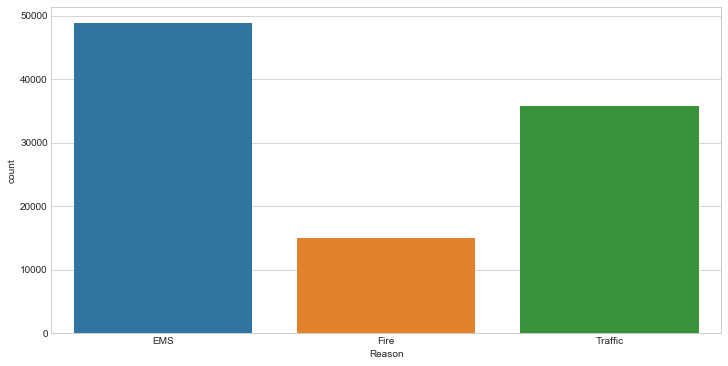

In [14]:
fig,axes = plt.subplots(figsize=(12,6))
sns.countplot(x='Reason',data=df)

#### Now use seaborn to create a countplot of 911 calls by Township.

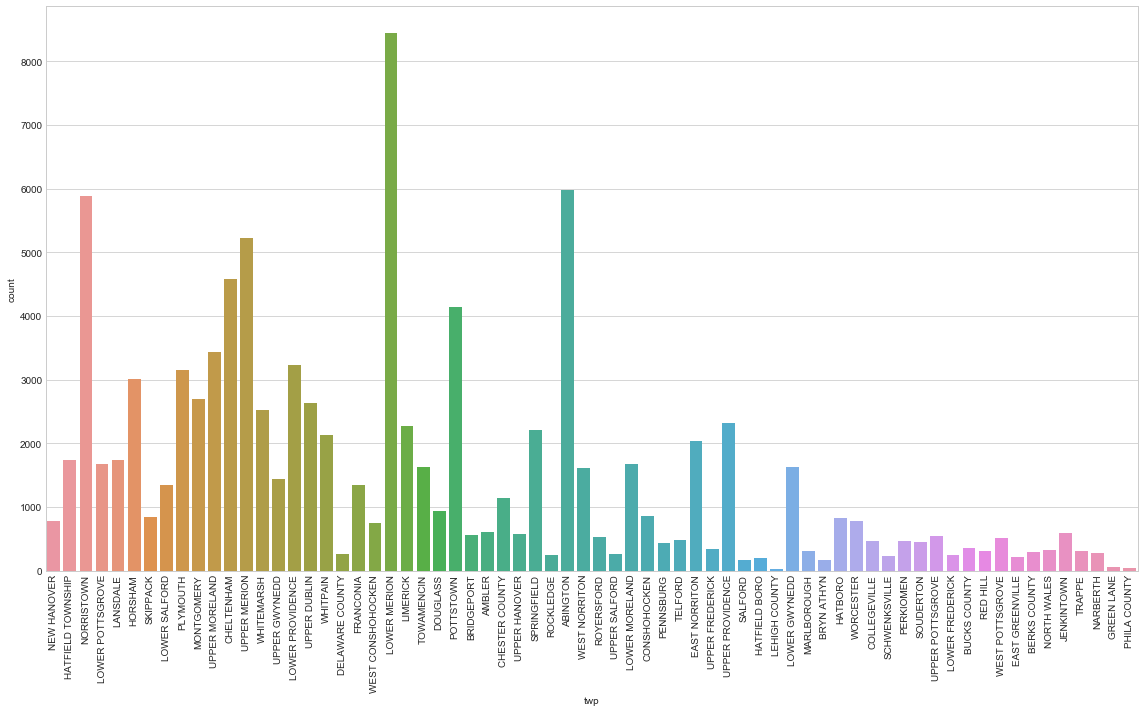

In [15]:
fig,axes = plt.subplots(figsize=(16,10))
sns.countplot(x='twp',data=df)
# twp_graph.set_xticklabels(rotation=30)
plt.xticks(rotation=90)
plt.tight_layout()

#### Now use seaborn to create a countplot of 911 calls by zip.

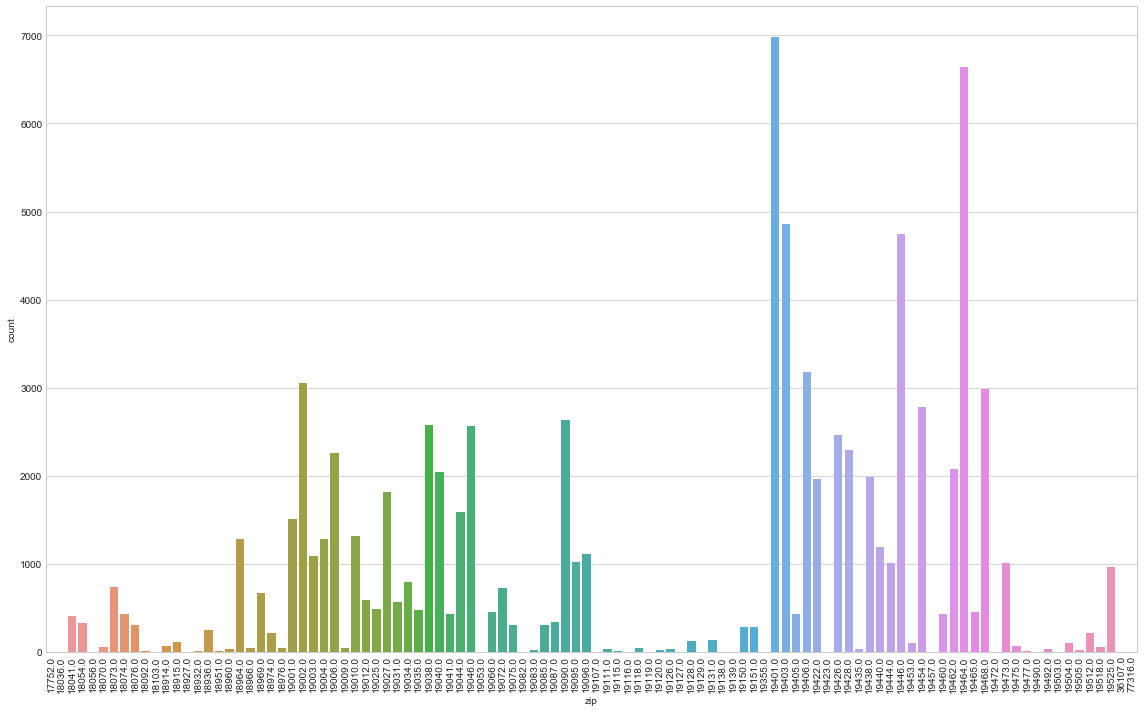

In [16]:
fig,axes = plt.subplots(figsize=(16,10))
sns.countplot(x='zip',data=df)
# twp_graph.set_xticklabels(rotation=30)
plt.xticks(rotation=90)
plt.tight_layout()

#### Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

In [17]:
type(df['timeStamp'].iloc[0])

str

#### Timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.

In [18]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [19]:
#now we can grab anything we want from object
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [20]:
# Hour
df['timeStamp'].iloc[0].hour

17

In [21]:
# year
df['timeStamp'].iloc[0].year

2015

#### Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column

In [26]:
# create hour column
df['hour']=df['timeStamp'].apply(lambda x:x.hour)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [27]:
# create month column
df['month']=df['timeStamp'].apply(lambda x:x.month)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [28]:
# create day of week column
df['day of week']=df['timeStamp'].apply(lambda x:x.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


#### Notice how the Day of Week is an integer 0-6.

In [29]:
df['day of week'].unique()

array([3, 4, 5, 6, 0, 1, 2])

#### Use the .map() with this dictionary to map the actual string names to the day of the week

In [30]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [31]:
df['day of week']=df['day of week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


#### Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

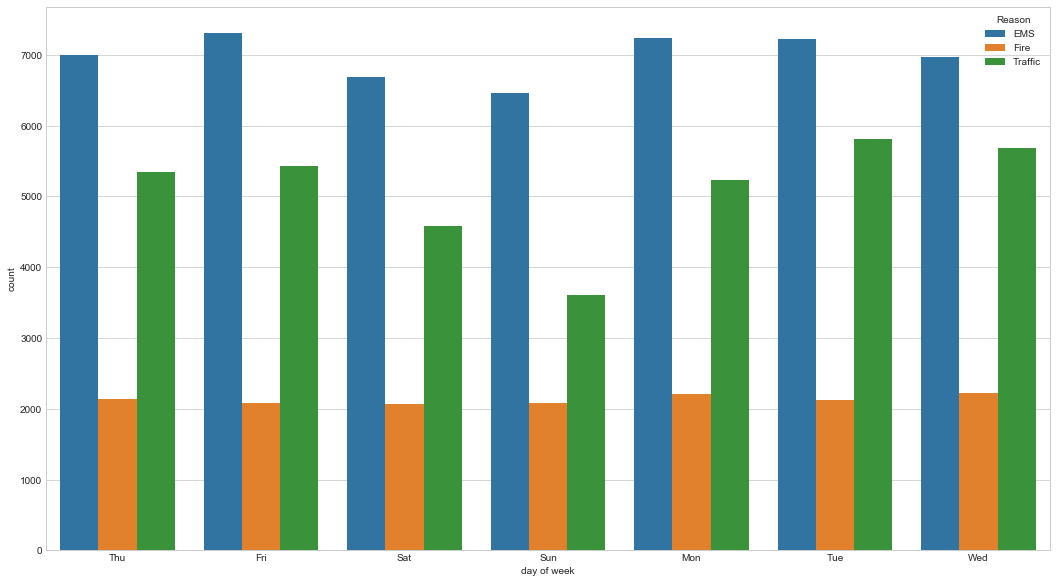

In [25]:
fig,axes=plt.subplots(figsize=(18,10))
sns.countplot(data=df, x='day of week', hue='Reason')

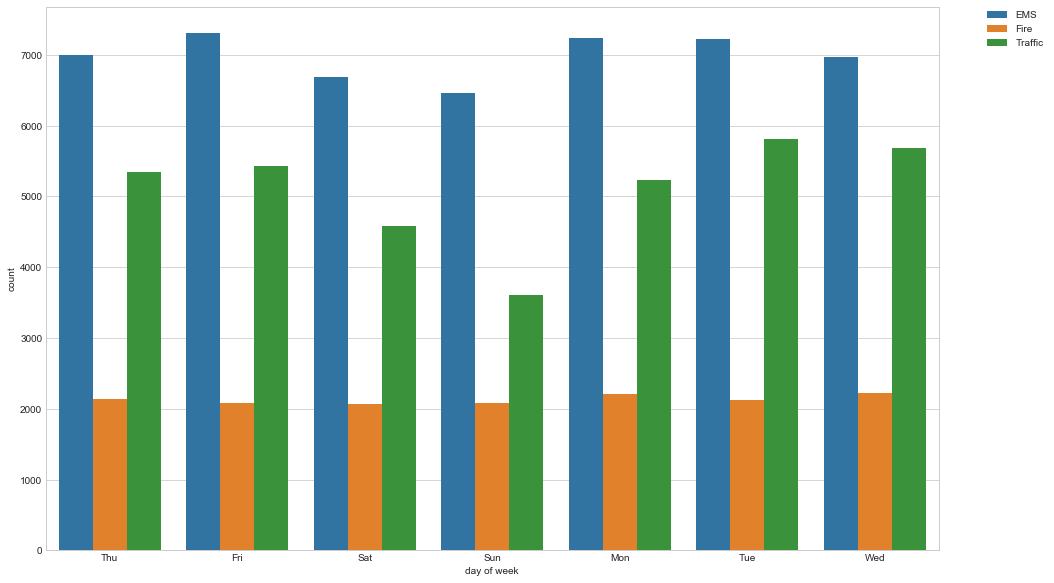

In [26]:
# To relocate the legend
fig,axes=plt.subplots(figsize=(16,10))
sns.countplot(data=df, x='day of week', hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Now do the same for Month.

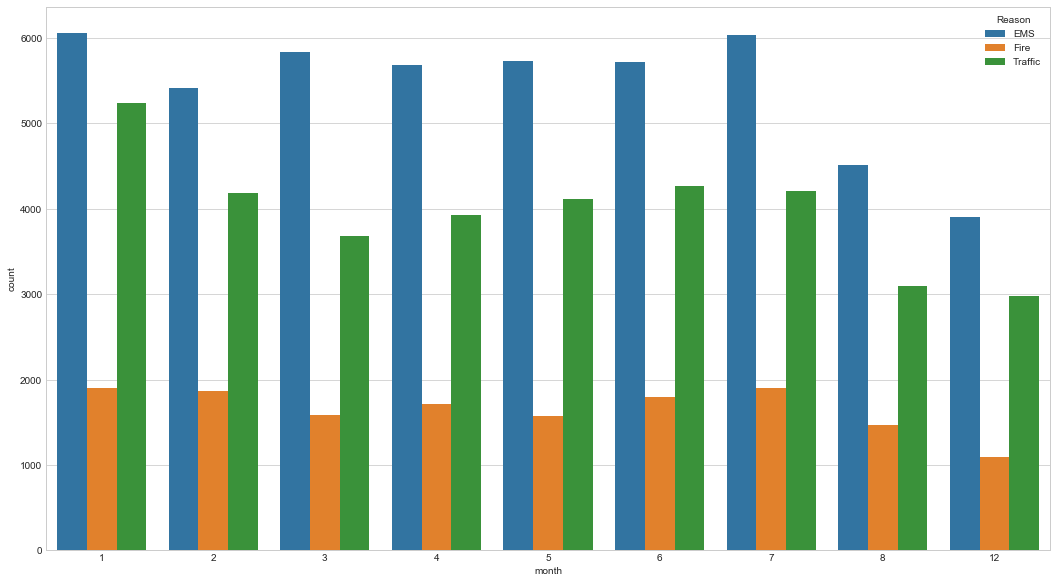

In [27]:
fig,axes=plt.subplots(figsize=(18,10))
sns.countplot(data=df, x='month', hue='Reason')

###### As we have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation.

In [34]:
byMonth = df.groupby('month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,day of week,Date
month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


#### Now create a simple plot off of the dataframe indicating the count of calls per month.

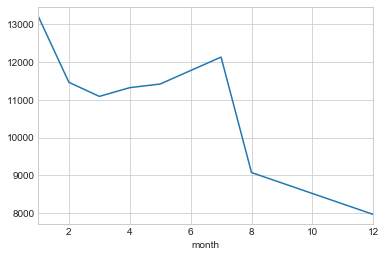

In [35]:
byMonth['twp'].plot()

#### Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. 

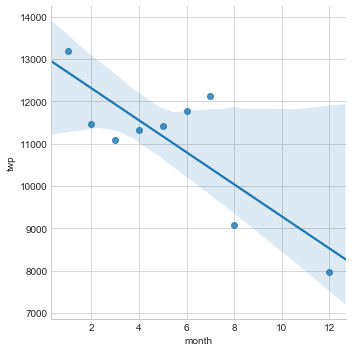

In [36]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

#### Create a new column called 'Date' that contains the date from the timeStamp column.

In [37]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


#### Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

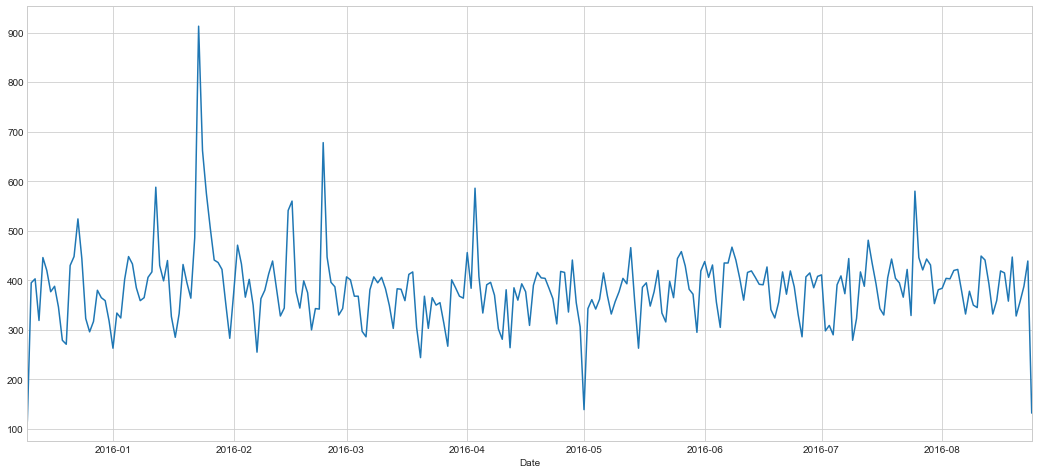

In [32]:
fig,axes=plt.subplots(figsize=(18,8))
df.groupby('Date').count()['twp'].plot()

#### Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

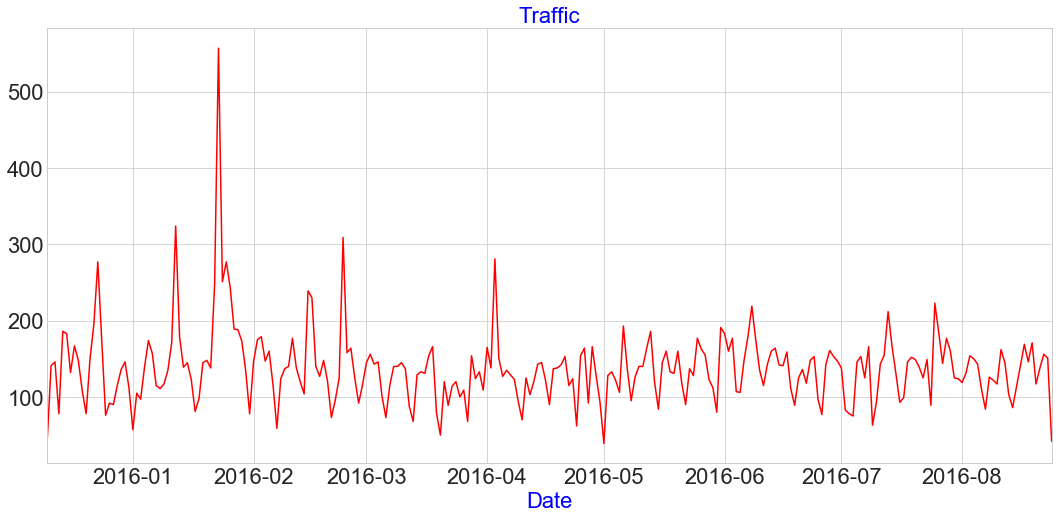

In [33]:
fig,axes=plt.subplots(figsize=(18,8))
df[df['Reason']=='Traffic'].groupby('Date').count()['Reason'].plot(color='r',fontsize=22)
plt.title('Traffic',fontsize=22, color='b')
plt.xlabel('Date',fontsize=22,color='b')

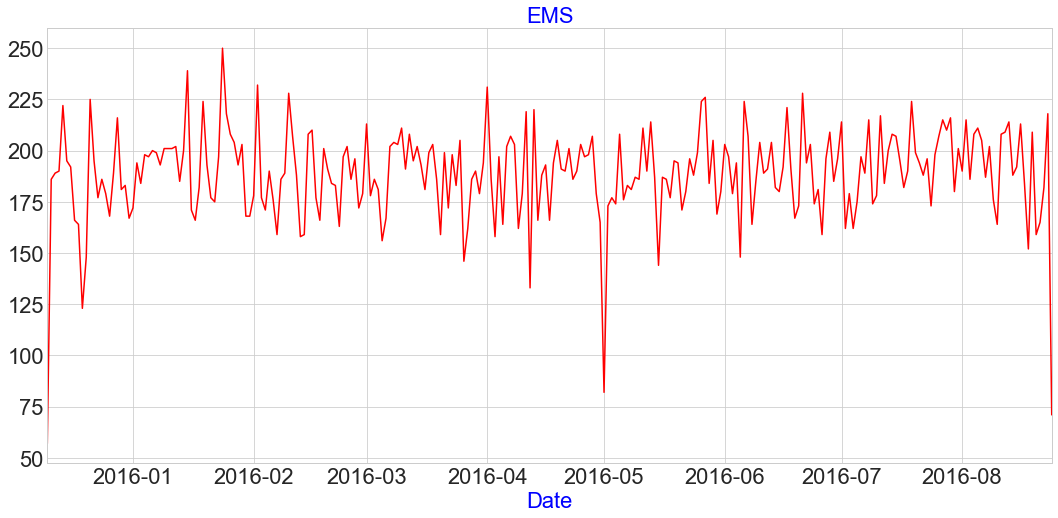

In [34]:
fig,axes=plt.subplots(figsize=(18,8))
df[df['Reason']=='EMS'].groupby('Date').count()['Reason'].plot(color='r',fontsize=22)
plt.title('EMS',fontsize=22, color='b')
plt.xlabel('Date',fontsize=22,color='b')

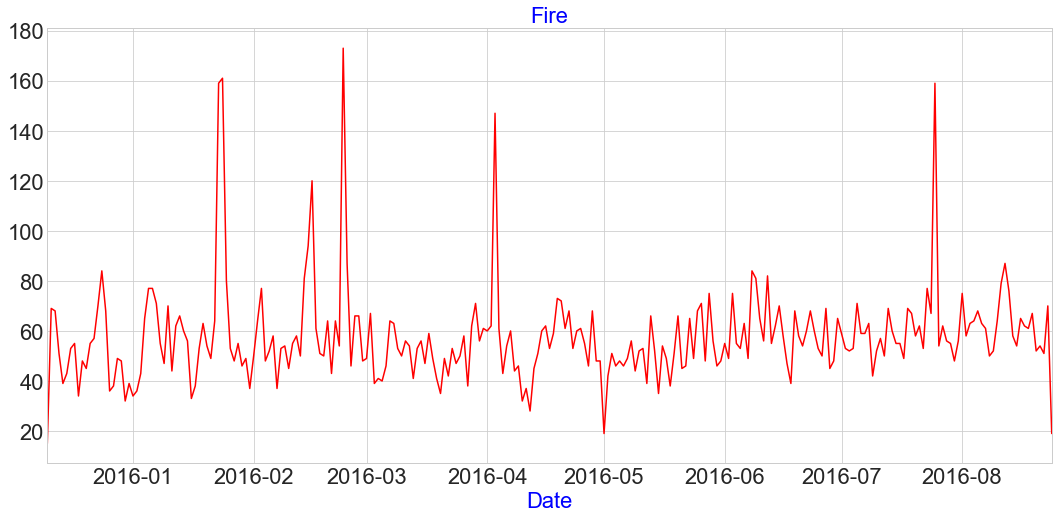

In [35]:
fig,axes=plt.subplots(figsize=(18,8))
df[df['Reason']=='Fire'].groupby('Date').count()['Reason'].plot(color='r',fontsize=22)
plt.title('Fire',fontsize=22, color='b')
plt.xlabel('Date',fontsize=22,color='b')

#### Now creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 

In [36]:
dayHour = df.groupby(by=['day of week','hour']).count()['Reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


#### Now create a HeatMap using this new DataFrame.

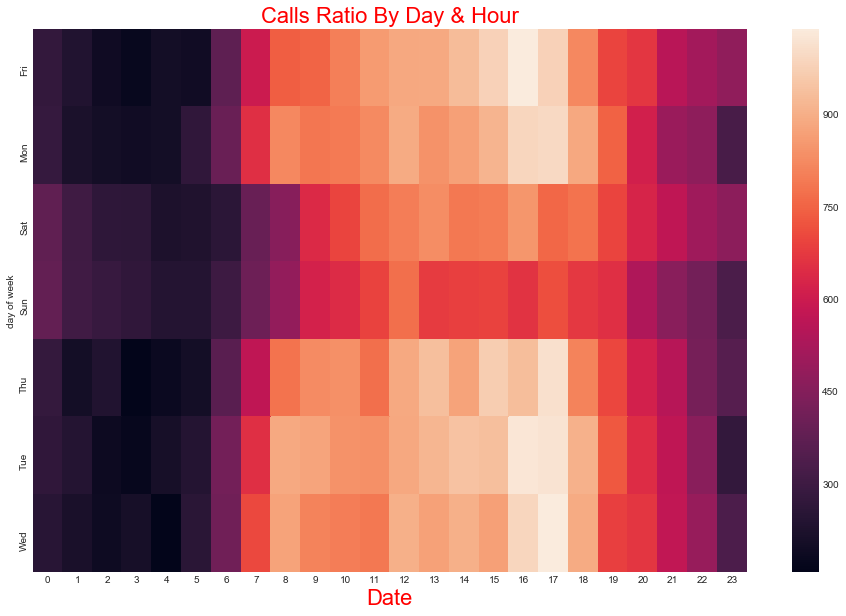

In [37]:
plt.figure(figsize=(16,10))
sns.heatmap(data=dayHour)
plt.title('Calls Ratio By Day & Hour',fontsize=22, color='r')
plt.xlabel('Date',fontsize=22,color='r')

#### Now create a clustermap using this DataFrame.

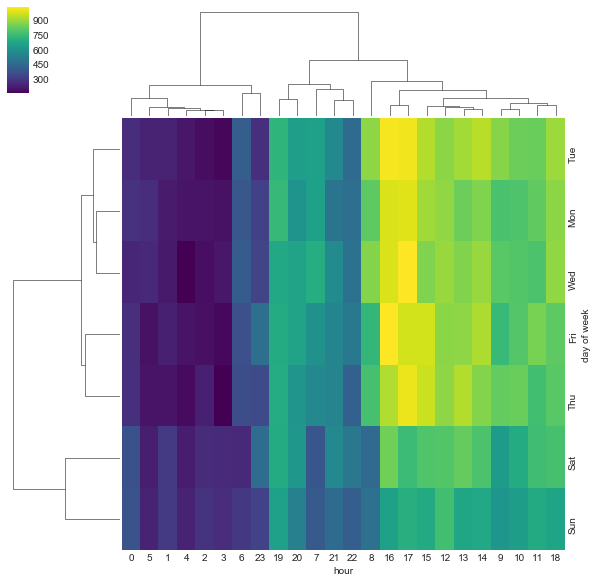

In [38]:
plt.figure(figsize=(16,10))
sns.clustermap(dayHour,cmap='viridis')

#### Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.

In [39]:
dayMonth = df.groupby(by=['day of week','month']).count()['Reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


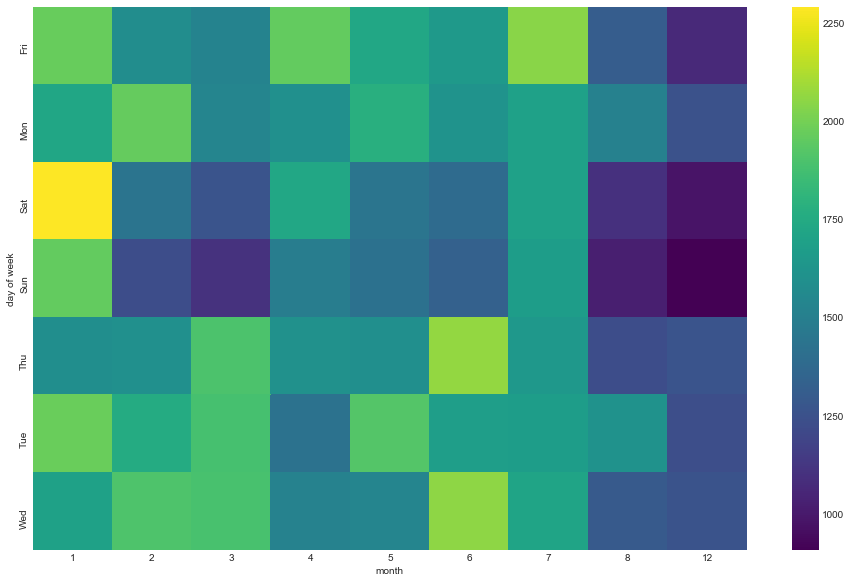

In [40]:
plt.figure(figsize=(16,10))
sns.heatmap(dayMonth,cmap='viridis')

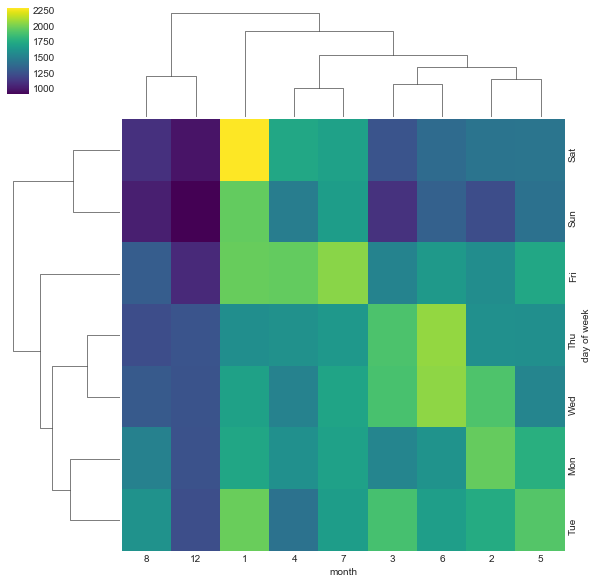

In [41]:
sns.clustermap(dayMonth,cmap='viridis')